# Imports and Dataset

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
dataset = pd.read_csv('.//datasets//heart_failure_clinical_records_dataset.csv')
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
if "Unnamed: 0" in dataset.columns:
    dataset.drop("Unnamed: 0",axis=1,inplace=True)
dataset

## Preprocessing

### Remove Date Columns

In [ ]:
if "date" in dataset.columns:
    dataset.drop("date",inplace=True,axis=1)
    print("date Deleted")
if "Date" in dataset.columns:
    dataset.drop("Date",inplace=True,axis=1)
    print("Date Deleted")

### Remove Dollar signs

In [ ]:
dollar = '$'
if(len(dataset) > 100):
    for column in dataset.columns:
        X = dataset[column][:50].values
        for val in X:
            if( "$" in str(val)):
                prices_list.append(column)
                break;
            break;
            
prices_list

In [ ]:
if(prices_list):
    cost_values = dataset[prices_list].values
    new_2darray = []
    for array in cost_values:
        new_array = []
        for val in array:
            new_val = (re.sub("[^0-9]", "", val))
            if new_val:
                new_val = float(new_val)
            else:
                new_val = np.NaN
            new_array.append(new_val)
        new_2darray.append(new_array)
new_2darray

In [ ]:
if(prices_list):
    prices_data = pd.DataFrame(new_2darray,columns= prices_list)

In [ ]:
if(prices_list):
    dataset.drop(prices_list,inplace=True,axis=1)

In [ ]:
if(prices_list):
    dataset[prices_list] = prices_data

### Define Index / ID Columns and Target Columns

In [ ]:
target_column = 'DEATH_EVENT'
id1 = "id"

### Categorize into numerical and categorical

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [15]:
datatypes = dataset.dtypes
datatypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [16]:
cat_cols = []
num_cols = []

columns = dataset.columns
if id1 in dataset.columns:
    dataset.drop(id1,inplace=True,axis=1)

for i in range(len(datatypes)):
    if datatypes.index[i] != target_column:
        if datatypes[i]=='object':
            unqval = dataset[datatypes.index[i]].nunique()
            if (unqval < 30):
                cat_cols.append(datatypes.index[i])
            else:
                del dataset[datatypes.index[i]]
                print('Deleted: ',datatypes.index[i])
        else:
            num_cols.append(datatypes.index[i])
num_cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

In [17]:
cat_cols

[]

In [18]:
cat_data = []
num_data = []
if(len(cat_cols)>0):
    cat_data = dataset[cat_cols]
if(len(num_cols)>0):
    num_data = dataset[num_cols]
y_data = dataset[target_column]

In [19]:
num_data,cat_data

(      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 0    75.0        0                       582         0                 20   
 1    55.0        0                      7861         0                 38   
 2    65.0        0                       146         0                 20   
 3    50.0        1                       111         0                 20   
 4    65.0        1                       160         1                 20   
 ..    ...      ...                       ...       ...                ...   
 294  62.0        0                        61         1                 38   
 295  55.0        0                      1820         0                 38   
 296  45.0        0                      2060         1                 60   
 297  45.0        0                      2413         0                 38   
 298  50.0        0                       196         0                 45   
 
      high_blood_pressure  platelets  serum_creatinine  serum_

### Outlier Detection 

In [4]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LB=Q1 - 1.5 * IQR
        UB=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LB or j>UB:
               p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print(p)

        
outlier_detect(num_data)

NameError: name 'num_data' is not defined

### Treat Missing Values

In [20]:
if len(num_data):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
    imputer.fit(num_data.iloc[:,:].values)
    num_data = pd.DataFrame(imputer.transform(num_data.iloc[:,:].values))
    num_data.columns = num_cols
num_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0
296,45.0,0.0,2060.0,1.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0
297,45.0,0.0,2413.0,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0


In [21]:
if(len(cat_data)>0 and len(num_data)>0):
    print("1")
    df = pd.concat([num_data,cat_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
    df.isnull().sum()
elif(len(num_data) > 0):
    print("2")
    df = pd.concat([num_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
else:
    print("3")
    df = pd.concat([cat_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
(df)

2


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0,0
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0,0
296,45.0,0.0,2060.0,1.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0,0
297,45.0,0.0,2413.0,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0,0


In [22]:
cat_data = df[cat_cols]
num_data = df[num_cols]
y_data = df[target_column]
df.drop(target_column,inplace=True,axis=1)
len(y_data)

299

In [23]:
#if len(cat_cols):
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(OH_encoder.fit_transform(df[cat_cols]))

# One-hot encoding removed index; put it back
X_encoded.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, X_encoded], axis=1)

In [24]:
OH_X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0
296,45.0,0.0,2060.0,1.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0
297,45.0,0.0,2413.0,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0


### Sampling/ Unbalanced Check

In [25]:
count = y_data.value_counts()
print(count)
print(max(count))
print(min(count))
cond = min(count)/max(count)
print(cond)

0    203
1     96
Name: DEATH_EVENT, dtype: int64
203
96
0.4729064039408867


In [26]:
from imblearn.over_sampling import ADASYN
from collections import Counter
if(cond<0.3):
    counter = Counter(y_data)
    print('before :',counter)
    ADA = ADASYN(random_state=130,sampling_strategy='minority')
    OH_X,y_data = ADA.fit_resample(OH_X,y_data)
    counter = Counter(y_data)
    print("after :",counter)

### Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc_x = StandardScaler()

In [29]:
OH_X = sc_x.fit_transform(OH_X)

In [30]:
OH_X

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

### Splitting Dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(OH_X,y_data,test_size=0.2,random_state=0)

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score
def write_report(model_name, remarks):
 preds = model_name.predict(X_test)
 report = classification_report(y_test,preds)
 balanced_accuracy = '-'
 roc_score = roc_auc_score(y_test, preds)
 accuracyscore = accuracy_score(y_test, preds)
 print(f'\n{model_name}\n {report}\n  accuracy score: {accuracyscore}\n Roc auc score: {roc_score}\n Remarks: {remarks}')
 with open("reports.txt", "a") as myfile:
   myfile.write(f'\n{model_name}\n {report}\n  accuracy score: {accuracyscore}\n Roc auc score: {roc_score}\n Remarks: {remarks}')

## MODEL TRAINING

[[36  1]
 [10 13]] No of Estimators:  10 0.8166666666666667
[[35  2]
 [ 9 14]] No of Estimators:  15 0.8166666666666667
[[36  1]
 [13 10]] No of Estimators:  20 0.7666666666666667
[[34  3]
 [10 13]] No of Estimators:  25 0.7833333333333333
[[36  1]
 [10 13]] No of Estimators:  50 0.8166666666666667
[[36  1]
 [ 8 15]] No of Estimators:  100 0.85
[[36  1]
 [ 8 15]] No of Estimators:  200 0.85


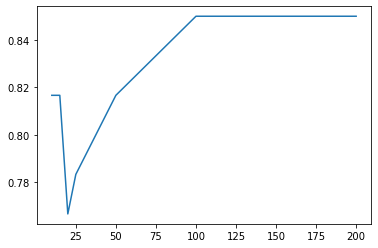

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
nodes = [10,15,20,25,50,100,200]
accuracy =[]
for node in nodes:    
    model = RandomForestClassifier(criterion = 'entropy', random_state=0, n_estimators=node)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    accs = accuracy_score(y_test,preds)
    accuracy.append(accs)
    print(confusion_matrix(y_test,preds),'No of Estimators: ', node,accs)

sns.lineplot(x=nodes,y=accuracy)

In [34]:
from xgboost import XGBClassifier   #XGBoostClassifier
classifier = XGBClassifier(max_depth=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[14:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[33  4]
 [ 7 16]]


C:\Anaconda3\envs\tensorflow_en\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8166666666666667

In [35]:
rfc=RandomForestClassifier(random_state=42)

In [36]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [37]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

KeyboardInterrupt: 

In [ ]:
# rfc=RandomForestClassifier(random_state=42,criterion= 'gini',max_depth=4,max_features= 'auto',n_estimators= 200)

In [ ]:
# rfc.fit(X_train, y_train)
# preds = rfc.predict(X_test)
# accs = accuracy_score(y_test,preds)
# accuracy.append(accs)
# print(confusion_matrix(y_test,preds),'Accuracy: ',accs)